<a href="https://colab.research.google.com/github/Madumali-Prasad/Madumali-Prasad/blob/main/Tweet_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweet Sentiment Analysis
<img src="https://cdn.dribbble.com/users/119773/screenshots/4226968/big_2x.gif">

### Import Required Libaries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import seaborn as sns
from wordcloud import WordCloud
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from nltk import word_tokenize
import joblib
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Reading the data

In [ ]:
df= pd.read_excel("/content/Tweets_Final.xlsx")
print(f"Shape of the Tweet dataframe {df.shape}")
print(f"There are of {df.shape[0]} cleaned Tweets")

Shape of the Tweet dataframe (2990, 3)
There are of 2990 cleaned Tweets


In [ ]:
#Random Sample of dataset
df.sample(frac=0.005)


,Date and Time,Content,Status
1471,2021-12-07 16:34:00+00:00,Training: Italy-Croatia project on blue econom...,positive
2448,2021-04-09 00:19:52+00:00,"Brace Yourself, Real Estate Prices Are Going B...",Positive
671,2022-01-27 23:35:02+00:00,Tide of migrants continues to pour into Austri...,Neutral
2814,2021-09-25 15:52:38+00:00,The One-Two Punch to Put Europe Back on Its Fe...,neutral
2553,2022-03-15 16:12:19+00:00,ECB’s Monetary Policy Can Help Return Finland ...,neutral
2619,2022-02-06 19:59:32+00:00,advisers warn UK CO2 emissions 'up',Neutral
2006,2021-10-12 21:42:57+00:00,Recession risk looms for Germany as business c...,Positive
15,2022-03-17 13:52:30+00:00,"At multi-year lows, RSI offers strongest overs...",Positive
1867,2021-10-26 12:56:15+00:00,"Business left to resolve border delays, survey...",Negative
49,2022-03-14 08:31:53+00:00,EUR/USD: Comfortable at lows,Negative


In [ ]:
#Check duplicates 
print(f"Number of duplicate items {len(df)-len(df.drop_duplicates())}")

Number of duplicate items 0


In [ ]:
#Check null values in the dataset
print(df.isnull().sum())

Date and Time    0
Content          0
Status           0
dtype: int64


In [ ]:
#Remove the row with a null value
df=df.dropna()

In [ ]:
#Labels of the dataset
print(list(df["Status"].unique()))

['Neutral', 'Positive', 'Negative', 'neutral', 'negetive', 'positive', 'negative']


In [ ]:
#Add a numerical column
#0-Negative
#1-Nutral
#2-Positive
df2=df.copy()
score=[]
for idx,row in df2.iterrows():
    label=row["Status"].lower()
    if label=="negetive" or label=="negative":
        score.append(0)
    
    elif label=="nutral" or label=="neutral":
        score.append(1)
    
    elif label=="positive":
        score.append(2)
    
    else:
        print(label)

print(len(score),len(df2))
df2["Score"] = score 

#Convert Score column into categorical type
df2["Score"]=df2["Score"].astype("category")

2990 2990


In [ ]:
#The dataset with add new column
df2.sample(frac=0.005)

,Date and Time,Content,Status,Score
907,2022-01-27 22:48:55+00:00,UK service sector 'slows again',Negative,0
640,2022-01-27 23:42:44+00:00,Brexit Vote Clouds EU-U.S. Trade Deal,Negative,0
40,2022-03-14 14:33:31+00:00,stays focused on 1.0879 ï¿½ Commerzbank,Neutral,1
1994,2021-10-14 08:39:52+00:00,Ireland to start selling part of its 71% stake...,Positive,2
2421,2021-04-10 06:41:45+00:00,Portugal Lurches Into Austerity Trap With Cred...,neutral,1
2691,2021-12-23 01:33:39+00:00,Five Sparks To Ignite Global Mergers &amp; Acq...,Neutral,1
1800,2021-11-01 18:03:00+00:00,Surging fuel and food prices send eurozone inf...,Positive,2
1014,2022-01-27 22:33:21+00:00,India factory output surges 8.2%,positive,2
2329,2021-05-07 04:24:20+00:00,"RBA June Rate Cut Debate Finely Balanced, Minu...",Positive,2
1491,2021-12-04 20:12:16+00:00,Denmark’s largest lifelong pension plan names ...,positive,2


## Data Cleaning

In [ ]:
##Function 

stopwords_list = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
punctuations='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
lst=list(punctuations)

def remove_unwanted(review):
    splitReview = review.split()
    splitReview = [word for word in splitReview if not word in stopwords_list] #Remove unwanted words
    splitReview = [lemmatizer.lemmatize(word) for word in splitReview]  #Change the tense of the word
    splitReview = [porter_stemmer.stem(word) for word in splitReview]  #Remove stemming
    clean_review = ' '.join(splitReview)
    return clean_review

def clean_text(text):
    text=text.lower()
    for i in lst:
        text = text.replace(i,'')
    clean_text= remove_unwanted(text)
    return clean_text

In [ ]:
for idx,row in df2.iterrows():
    row["Content"]=clean_text(row["Content"])

In [ ]:
#The dataset after cleaning
df2.sample(frac=0.005)

,Date and Time,Content,Status,Score
2353,2021-05-02 22:17:02+00:00,Developing world needs euro crisis defense: Zo...,Negative,0
1040,2022-01-27 23:39:57+00:00,Eurozone recession 'to continue',positive,2
1711,2021-11-13 17:56:44+00:00,Eurozone Industrial Output Falls,Positive,2
697,2022-01-27 23:30:08+00:00,France denies state 'bankruptcy',Negative,0
1282,2021-12-20 04:52:30+00:00,True costs: How the oil industry cast climate ...,negetive,0
2058,2021-06-14 08:21:46+00:00,Europe’s war over sovereignty is just beginning,Positive,2
1739,2021-11-09 06:33:36+00:00,German Industrial Output Up Slightly,Positive,2
2091,2021-06-09 18:11:51+00:00,UK talks with France fail to solve post-Brexit...,Negative,0
45,2022-03-14 10:47:57+00:00,Sluggish below immediate support-turned-resist...,Negative,0
167,2022-02-27 23:57:34+00:00,Spain's Bankia returns to profit,Positive,2


Text(0.5, 0.98, 'Histogram number of words in reviews')

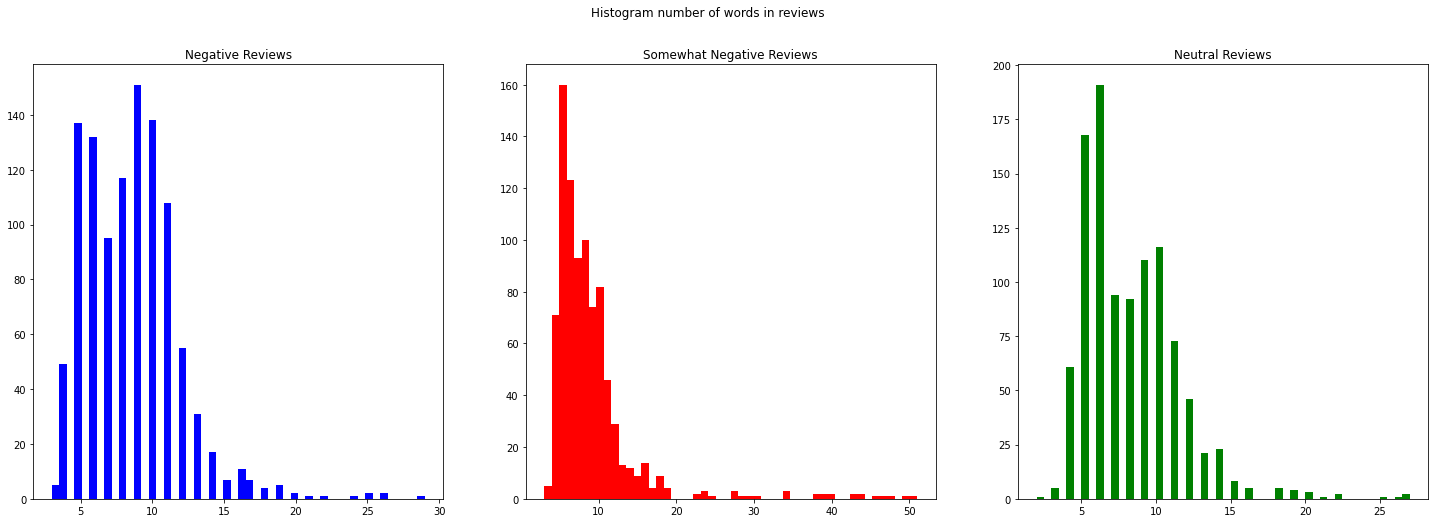

In [ ]:
from matplotlib import pyplot as plt
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25,8))

ax1.hist(df2[df2['Score'] == 0]['Content'].str.split().map(lambda x: len(x)), bins=50, color='b')
ax1.set_title('Negative Reviews')

ax2.hist(df2[df2['Score'] == 1]['Content'].str.split().map(lambda x: len(x)), bins=50, color='r')
ax2.set_title('Somewhat Negative Reviews')

ax3.hist(df2[df2['Score'] == 2]['Content'].str.split().map(lambda x: len(x)), bins=50, color='g')
ax3.set_title('Neutral Reviews')

f.suptitle('Histogram number of words in reviews')

In [ ]:
def pie_chart(df):
    review_count=df.groupby(["Score"]).count()
    print(review_count["Content"])
    plt.figure(figsize=(8,8))
    plt.title('Tweet Count',fontsize=20)

    label=["Negative","Neutral","Positive"]
    plt.pie(list(review_count["Content"]),labels=label,shadow = True,autopct='%1.1f%%',textprops={'fontsize': 14})
    #plt.legend(loc='best')
    plt.show()

Score
0    1079
1     878
2    1033
Name: Content, dtype: int64


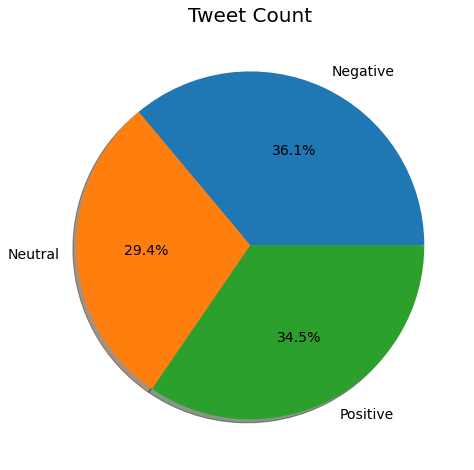

In [ ]:
#Check how the data is distributed

pie_chart(df2)

### Create Training and Testing Sets 

In [ ]:
text=df2['Content'].astype("str")
target=df2['Score'].astype("category")

#80% for Training 20% for Testing

x_train,x_test,y_train,y_test=train_test_split(text,target,test_size=0.2,random_state=25)
print(f"Training Data Points-{len(x_train)} and Testing Data Points-{len(x_test)}")

Training Data Points-2392 and Testing Data Points-598


### Create tfidf Matrix and Convert data to the correct format to feed into the Machine Learning MOdel

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=100000,max_df=0.8)
vectorizing_model=vectorizer.fit(x_train)
x_train_vectors=vectorizing_model.transform(x_train)
x_test_vectors=vectorizing_model.transform(x_test)

In [ ]:
print(f"Size of the Training Input Set {x_train_vectors.shape}")
print(f"Size of the Testing Input Set {x_test_vectors.shape}")


Size of the Training Input Set (2392, 29150)
Size of the Testing Input Set (598, 29150)


In [ ]:
#Save the Vectorizer for fututre Use
joblib.dump(vectorizing_model,"Tweet_Vectorizer")

['Tweet_Vectorizer']

## Building the Models

1. Naive Bayes Algorithm

Training Accuracy score: 0.9561
Testing Accuracy score: 0.5886
              precision    recall  f1-score   support

    Negative       0.50      0.62      0.56       209
     Neutral       0.71      0.67      0.69       178
    Positive       0.60      0.49      0.54       211

    accuracy                           0.59       598
   macro avg       0.60      0.59      0.59       598
weighted avg       0.60      0.59      0.59       598



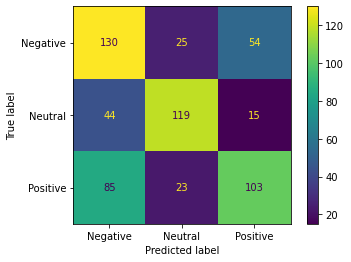

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model_NB= MultinomialNB()
model_NB.fit(x_train_vectors.toarray(),y_train)
predictions_NB=model_NB.predict(x_test_vectors.toarray())

print("Training Accuracy score: "+str(round(accuracy_score(y_train,model_NB.predict(x_train_vectors.toarray())),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,predictions_NB),4)))

cm_NB=confusion_matrix(y_test,predictions_NB)
print(classification_report(y_test,predictions_NB,target_names=["Negative","Neutral","Positive"]))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_NB,display_labels=["Negative","Neutral","Positive"])
disp1.plot()


2.KNN Algorithm

Training Accuracy score: 0.7232
Testing Accuracy score: 0.4816
              precision    recall  f1-score   support

    Negative       0.46      0.50      0.48       209
     Neutral       0.50      0.53      0.51       178
    Positive       0.49      0.43      0.46       211

    accuracy                           0.48       598
   macro avg       0.48      0.48      0.48       598
weighted avg       0.48      0.48      0.48       598



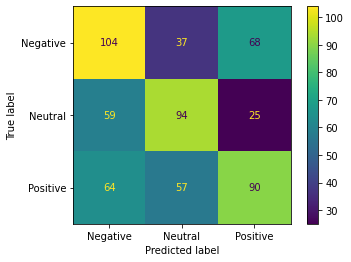

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_neigh = KNeighborsClassifier(n_neighbors=3)
model_neigh.fit(x_train_vectors.toarray(),y_train)
predictions_neigh=model_neigh.predict(x_test_vectors.toarray())

print("Training Accuracy score: "+str(round(accuracy_score(y_train,model_neigh.predict(x_train_vectors.toarray())),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,predictions_neigh),4)))

cm_neigh=confusion_matrix(y_test,predictions_neigh)
print(classification_report(y_test,predictions_neigh,target_names=["Negative","Neutral","Positive"]))

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_neigh,display_labels=["Negative","Neutral","Positive"])
disp2.plot()

In [ ]:
#Save the Model
joblib.dump(model_NB,"Best_model.sav") 

['Best_model.sav']

## Real Time Prediction

### Getting Real-Time Tweets according to the Hashtags
<img src="https://media.wired.com/photos/5c80449f1137e42560bf33e5/master/pass/Twitter-NLP_AnimationStation.gif">

In [ ]:
import tweepy 
from tqdm import tqdm
import re
import datetime

#Twitter API credentials
consumer_key = "vKGMwbp2xKlxaM1kvyWMUTyxx"
consumer_secret = "UAAuvczizcqGqD6A7NcMaM4eemPVumqadT7ZRJsfBS5pEVJiJn"
access_key = "954661768915275776-m8w4eUgc0TLth6h5i9S8iswIiVSFwHx"
access_secret = "lsdKaFayiH1Auik0oi2fOyKusVeiR8uIFW6iecKAOk9Cu"

import datetime 
def get_all_tweets(screen_name):
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    alltweets = []  

    new_tweets = api.user_timeline(screen_name = screen_name,count=1000)
    
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1

    while len(new_tweets) > 0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=1000,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    return outtweets

out=[]
for screen_names in tqdm(["wef"," Bloomberg","markets","FinancialNews","GoldmanSachs","IBDinvestors","nytimesbusiness","ecfin","FinancialTimes", "TheEconomist","Benzinga","OxfordEconomics","CNBC","CNBCnow","EuropeEconomics","MarketWatch","bespokeinvest","BBCWorld","IMFNews"]):
  get=get_all_tweets(screen_names)
  print(f" 💯 {screen_names} extracted {len(get)} tweets")
  out=out+get

print(f"There are {len(out)} tweets extracted")

  5%|▌         | 1/19 [00:06<01:52,  6.25s/it]

 💯 wef extracted 3250 tweets


 11%|█         | 2/19 [00:14<02:02,  7.20s/it]

 💯  Bloomberg extracted 3207 tweets


 16%|█▌        | 3/19 [00:19<01:43,  6.47s/it]

 💯 markets extracted 3250 tweets


 21%|██        | 4/19 [00:24<01:29,  5.98s/it]

 💯 FinancialNews extracted 3250 tweets


 26%|██▋       | 5/19 [00:31<01:24,  6.07s/it]

 💯 GoldmanSachs extracted 3250 tweets


 32%|███▏      | 6/19 [00:37<01:21,  6.29s/it]

 💯 IBDinvestors extracted 3250 tweets


 37%|███▋      | 7/19 [00:43<01:11,  5.97s/it]

 💯 nytimesbusiness extracted 3250 tweets


 42%|████▏     | 8/19 [00:50<01:08,  6.26s/it]

 💯 ecfin extracted 3250 tweets


 47%|████▋     | 9/19 [00:55<00:58,  5.86s/it]

 💯 FinancialTimes extracted 3250 tweets


 53%|█████▎    | 10/19 [01:01<00:53,  5.90s/it]

 💯 TheEconomist extracted 3250 tweets


 58%|█████▊    | 11/19 [01:09<00:54,  6.78s/it]

 💯 Benzinga extracted 3248 tweets


 63%|██████▎   | 12/19 [01:15<00:45,  6.48s/it]

 💯 OxfordEconomics extracted 3246 tweets


 68%|██████▊   | 13/19 [01:23<00:41,  6.87s/it]

 💯 CNBC extracted 3250 tweets


 74%|███████▎  | 14/19 [01:29<00:33,  6.61s/it]

 💯 CNBCnow extracted 3250 tweets


 79%|███████▉  | 15/19 [01:30<00:19,  4.81s/it]

 💯 EuropeEconomics extracted 225 tweets


 84%|████████▍ | 16/19 [01:36<00:15,  5.17s/it]

 💯 MarketWatch extracted 3250 tweets


 89%|████████▉ | 17/19 [01:42<00:10,  5.44s/it]

 💯 bespokeinvest extracted 3249 tweets


 95%|█████████▍| 18/19 [01:49<00:05,  5.89s/it]

 💯 BBCWorld extracted 3250 tweets


100%|██████████| 19/19 [01:54<00:00,  6.05s/it]

 💯 IMFNews extracted 3250 tweets
There are 58675 tweets extracted


In [ ]:
startDate = datetime.datetime(2021, 1, 1, 12, 00, 00)

T_Text=[]
T_Create=[]
T_id=[]
req_hastags=["us","eu","economics","inflation","eurjpy","pips","eurjpy","forexsignal", "eurusd", "usdtry", "currency", "stockmarket", "forextrader", "forexmarket", "usd", "euro", "forex", "stockstoby","gbpusd", "dollar" , "market" , "volatility","economy" , "business", "finance" ,"investing",  "usdollar",  "Banks",  "Banking" , "Businessmen", "fluctuation", "bibm" , "currencyexchange" ,"Forex", "covid" ,"money", "news", "investment" , "coronavirus" , "politics", "stocks" ,"bitcoin" ,"entrepreneur", "economia" , "trade" ,"education" , "trading", "usa", "invest", "gdp" , "economist" ,"upsc","wealth", "technology" ,"crypto" ,"success", "trump" ,"pandemic","financialfreedom" , "history", "trader", "lockdown" ,"microeconomics" ,"macroeconomics" ,"investors" ,"realestate", "capitalism" ,"entrepreneurship","nifty", "world", "government", "cryptocurrency", "startup","gold","marketing","stockmarket","investing","trading","invest","sharemarket","daytrader","stock","wallstreet","nse","forextrader","bse","daytrading","stockmarketnews","forextrading","innovation","behaviouraleconomics","healtheconomics","economics_news","innovation","behaviouraleconomics","healtheconomics","economics_news "]

for i in range(len(out)):
  twts=out[i][2]
  hashtags=re.findall(r"#(\w+)",twts)
  dte=out[i][1]

  if dte > startDate:
    for j in hashtags:
      if j.lower().strip() in req_hastags:
        T_id.append(out[i][0])
        T_Create.append(out[i][1])
        T_Text.append(out[i][2])
        break

data_tweets=pd.DataFrame(list(zip(T_id,T_Create,T_Text)),columns=["id","created_at","text"])
print(f"There are {len(data_tweets)} tweets filtered in finance sector")

There are 993 tweets filtered in finance sector


In [ ]:
#Getting Predictions
#Libraries
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
import joblib
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [ ]:
vectorizing_model = joblib.load("/content/Tweet_Vectorizer") 
GS_model=joblib.load("/content/Best_model.sav") 

In [ ]:
##Function to clean news

stopwords_list = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
punctuations='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
lst=list(punctuations)

def remove_unwanted(review):
    splitReview = review.split()
    splitReview = [word for word in splitReview if not word in stopwords_list] #Remove unwanted words
    splitReview = [lemmatizer.lemmatize(word) for word in splitReview]  #Change the tense of the word
    splitReview = [porter_stemmer.stem(word) for word in splitReview]  #Remove stemming
    clean_review = ' '.join(splitReview)
    return clean_review

def clean_text(text):
    text=text.lower()
    for i in lst:
        text = text.replace(i,'')
    clean_text= remove_unwanted(text)
    return clean_text

In [ ]:
All_prds=[]

predict_labels={0:"Negative Review",1:"Neutral Review",2:"Positive Review"}
for idx in range(len(data_tweets)):
  cont=data_tweets.iloc[idx,2]
  comment=cont.split('https')[0].strip()
  comment_clean=clean_text(comment)
  vectorized_comment=vectorizing_model.transform([comment_clean])
  prd=GS_model.predict(vectorized_comment)
  All_prds.append(predict_labels[prd[0]])

  print(f"Tweet:{comment}")
  print(f"Prediction: {predict_labels[prd[0]]}\n")


Tweet:COVID-19: What you need to know about the #coronavirus pandemic
Prediction: Negative Review

Tweet:Food prices up, #trade forecast down: The economic stories to read this week
Prediction: Positive Review

Tweet:Economy news: The stories to read this week
Prediction: Positive Review

Tweet:4 things you need to know about the #metaverse this week
Prediction: Negative Review

Tweet:3 key points to bear in mind about #inflation's impact. 

Learn more:
Prediction: Positive Review

Tweet:Inflation continues to climb in US after hitting 40-year high
Prediction: Positive Review

Tweet:This is how blockchain technology is transforming life for farmers
Prediction: Neutral Review

Tweet:Shrinkflation: How inflation is downsizing some of your favourite foods
Prediction: Positive Review

Tweet:#Economics news: The stories to read this week
Prediction: Positive Review

Tweet:Inflation continues to climb in US after hitting 40-year high
Prediction: Positive Review

Tweet:The economic impact of 

In [ ]:
#Final Prediction Dataframe
data_tweets["Sentiment"]=All_prds
data_tweets.head(10)

,id,created_at,text,Sentiment
0,1516431729069858821,2022-04-19 15:01:12,COVID-19: What you need to know about the #cor...,Negative Review
1,1515397176121245703,2022-04-16 18:30:16,"Food prices up, #trade forecast down: The econ...",Positive Review
2,1512203712420368390,2022-04-07 23:00:35,Economy news: The stories to read this week h...,Positive Review
3,1511841310843580416,2022-04-06 23:00:31,4 things you need to know about the #metaverse...,Negative Review
4,1509198774731632640,2022-03-30 16:00:02,3 key points to bear in mind about #inflation'...,Positive Review
5,1506949087442128897,2022-03-24 11:00:34,Inflation continues to climb in US after hitti...,Positive Review
6,1506722532501733378,2022-03-23 20:00:19,This is how blockchain technology is transform...,Neutral Review
7,1506390428614070276,2022-03-22 22:00:40,Shrinkflation: How inflation is downsizing som...,Positive Review
8,1505250268727939075,2022-03-19 18:30:04,#Economics news: The stories to read this week...,Positive Review
9,1504166871859441670,2022-03-16 18:45:02,Inflation continues to climb in US after hitti...,Positive Review
